In [1]:
import sys
import os
PROJECT_ROOT = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(PROJECT_ROOT)

from model.utils import (
    load_and_clean_data,
    show_summary,
    plot_feature_distributions,
    plot_feature_correlation_heatmap,
    plot_feature_boxplots,
    plot_target_distributions,
    plot_target_boxplots,
    get_device_name,
    DEVICE_TARGET_FEATURES,
    INPUT_FEATURES
)

DEVICE = "conveyor_belt"
TARGET_FEATURES = DEVICE_TARGET_FEATURES[DEVICE]
DATA_DIR = "../Data/process/8#Belt Conveyer_merged.csv"
SAVE_PATH = f"../docs/images/{DEVICE}_plots/"

In [3]:
df = load_and_clean_data(DATA_DIR)

In [4]:
show_summary(df)

Data Info:
<class 'pandas.core.frame.DataFrame'>
Index: 766917 entries, 0 to 768620
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   datetime                      766917 non-null  object 
 1   location                      766917 non-null  object 
 2   High-Frequency Acceleration   766917 non-null  float64
 3   Low-Frequency Acceleration Z  766917 non-null  float64
 4   Temperature                   766917 non-null  float64
 5   Vibration Velocity Z          766917 non-null  float64
 6   Device                        766917 non-null  object 
 7   alignment_status              766917 non-null  float64
 8   bearing_lubrication           766917 non-null  float64
 9   crest_factor                  766917 non-null  float64
 10  electromagnetic_status        766917 non-null  float64
 11  fit_condition                 766917 non-null  float64
 12  kurtosis_opt                  766917 n

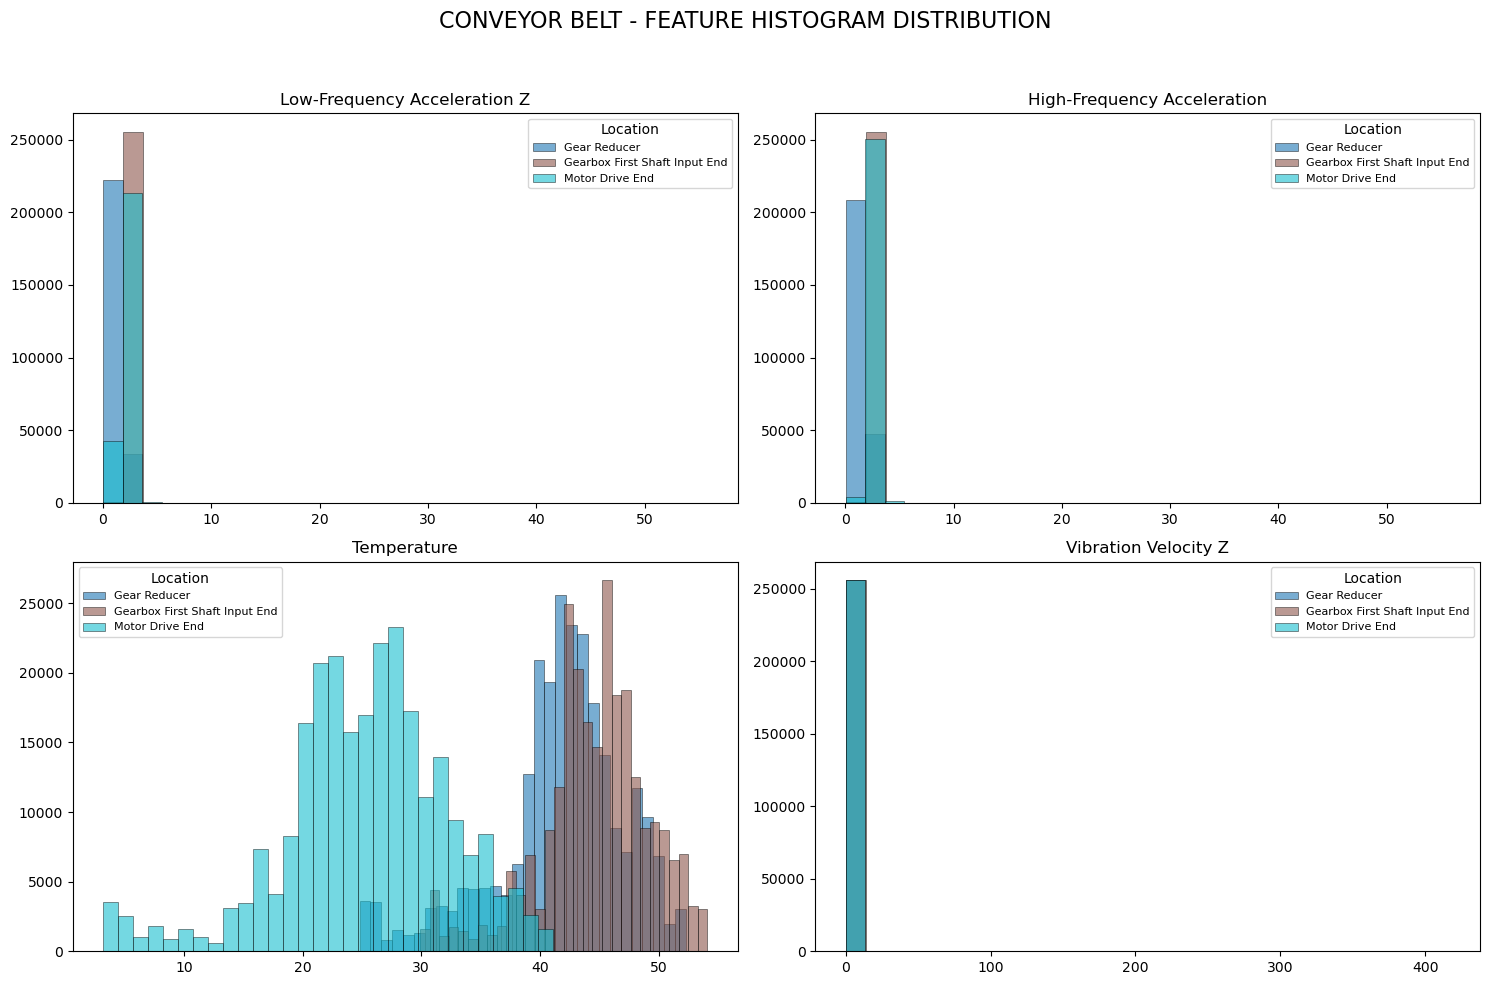

In [5]:
plot_feature_distributions(df, INPUT_FEATURES, f"{get_device_name(DEVICE)} - FEATURE HISTOGRAM DISTRIBUTION", save_path=SAVE_PATH)

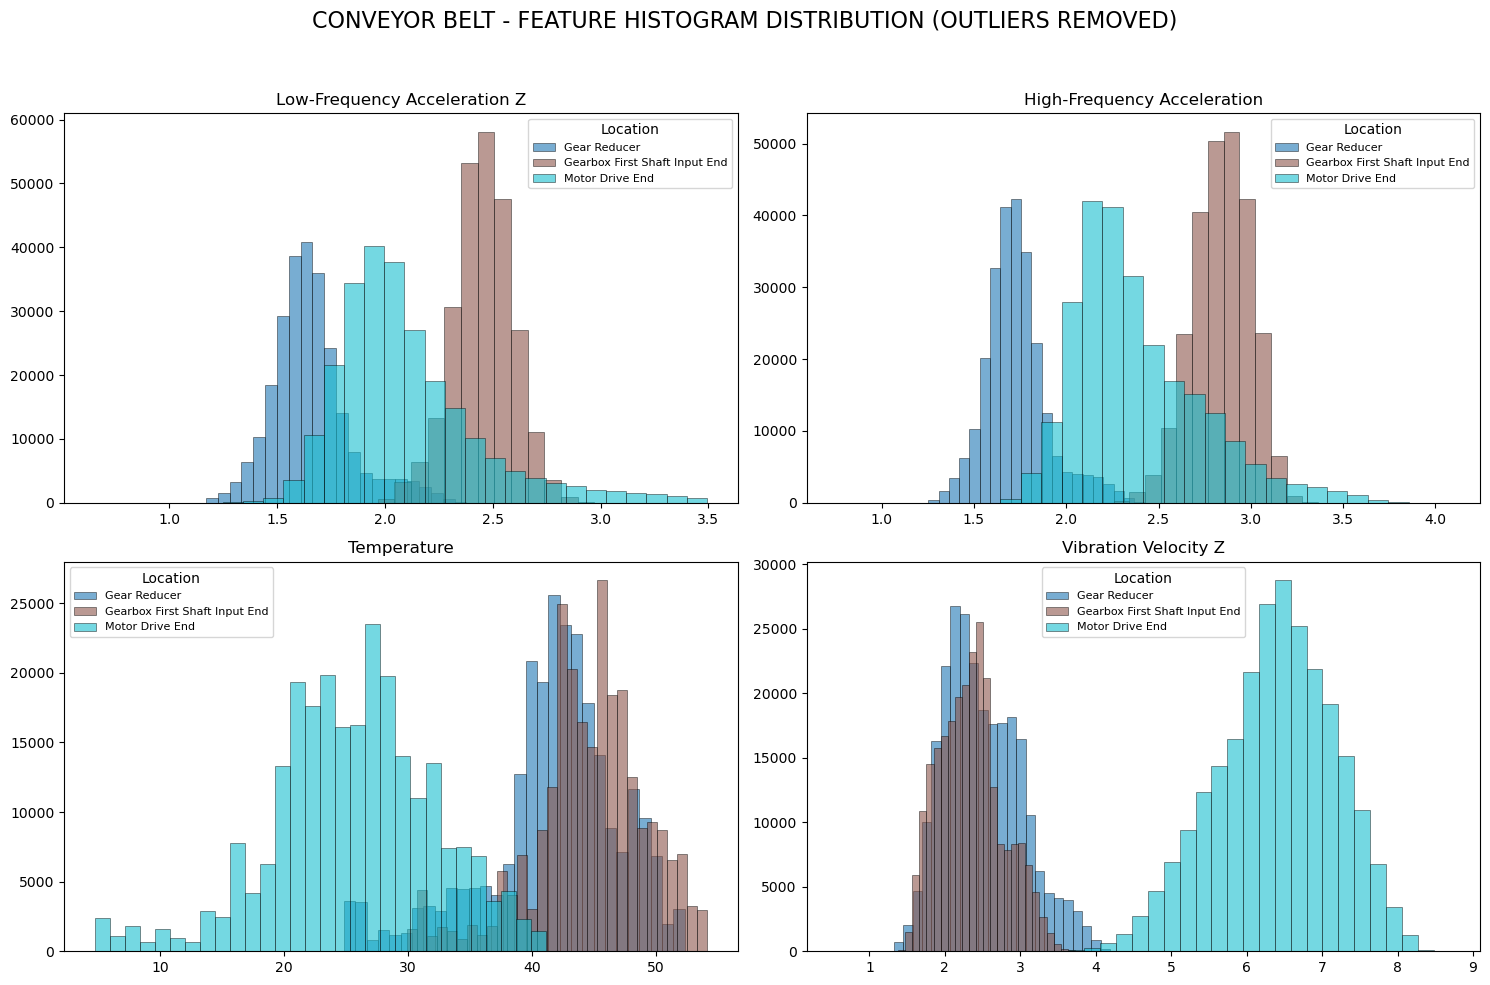

In [6]:
plot_feature_distributions(df, INPUT_FEATURES, f"{get_device_name(DEVICE)} - FEATURE HISTOGRAM DISTRIBUTION (OUTLIERS REMOVED)", remove_outliers=True, save_path=SAVE_PATH)

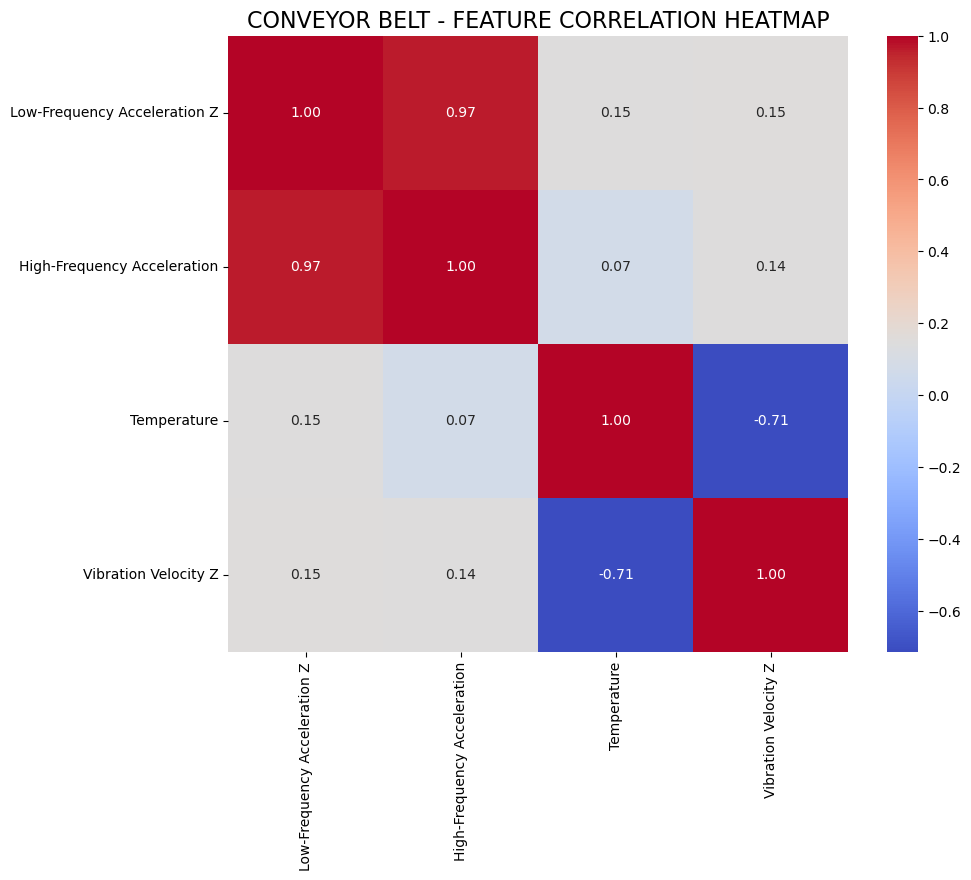

In [7]:
plot_feature_correlation_heatmap(df, INPUT_FEATURES, f"{get_device_name(DEVICE)} - FEATURE CORRELATION HEATMAP", save_path=SAVE_PATH)

In [ ]:
plot_feature_boxplots(df, INPUT_FEATURES, f"{get_device_name(DEVICE)} - FEATURE BOXPLOTS DISTRIBUTIONS", save_path=SAVE_PATH)

In [ ]:
plot_feature_boxplots(df, INPUT_FEATURES, f"{get_device_name(DEVICE)} - FEATURE BOXPLOTS DISTRIBUTIONS (OUTLIERS REMOVED)", remove_outliers=True,  save_path=SAVE_PATH)

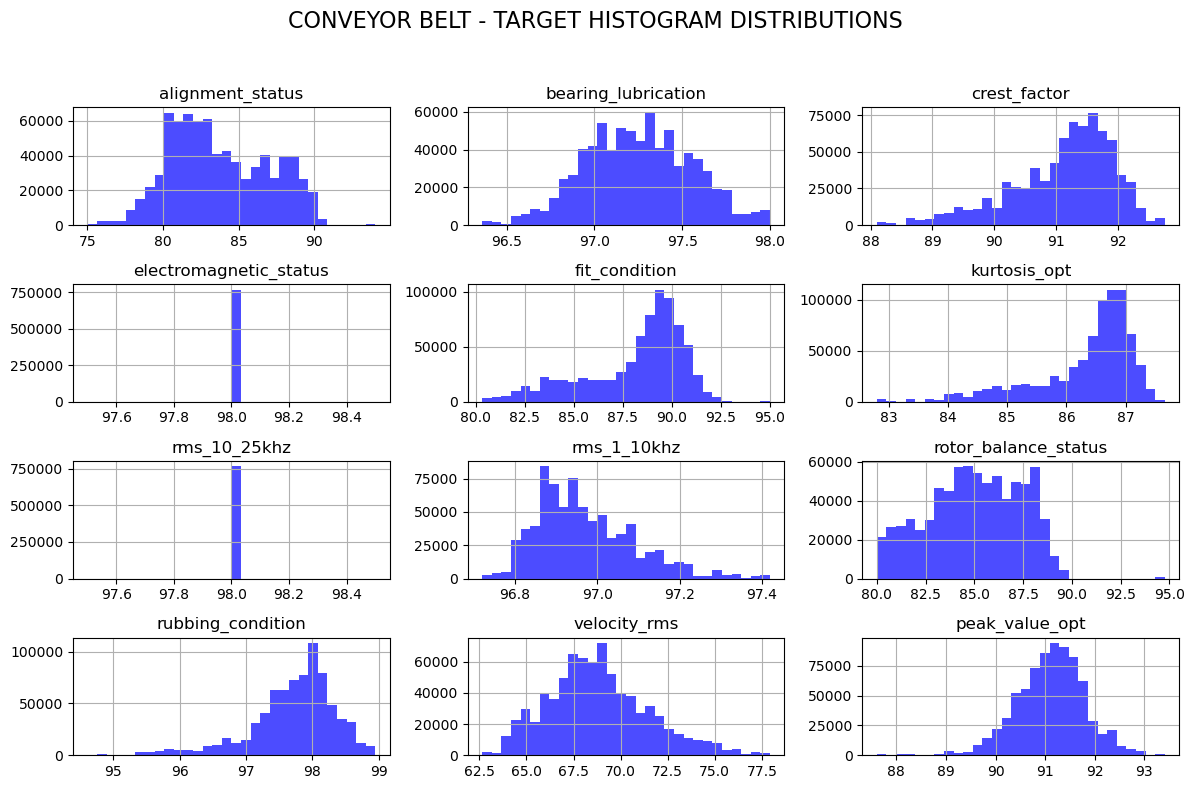

In [10]:
plot_target_distributions(df, TARGET_FEATURES, f"{get_device_name(DEVICE)} - TARGET HISTOGRAM DISTRIBUTIONS",save_path=SAVE_PATH)

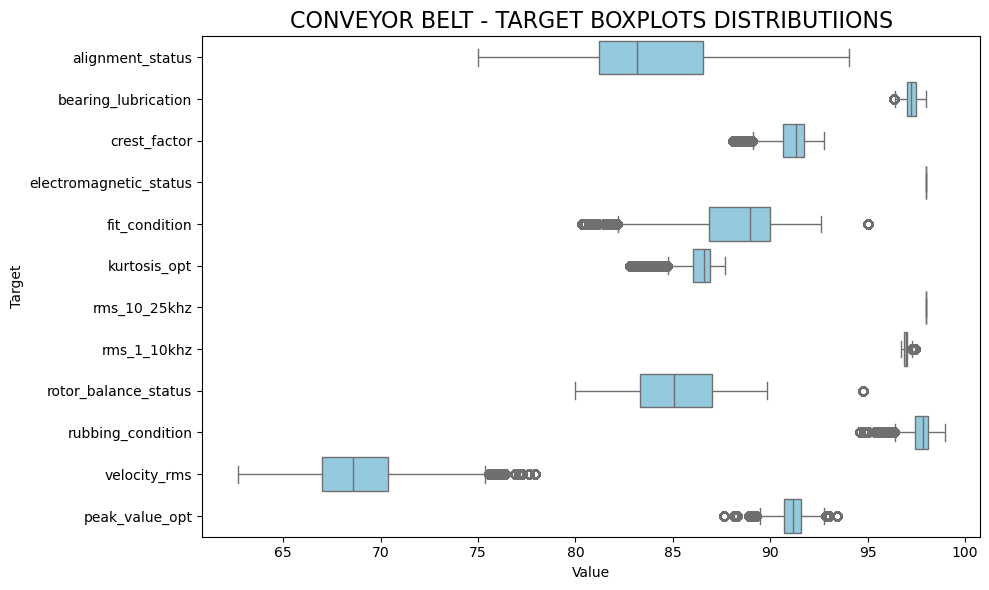

In [11]:
plot_target_boxplots(df, TARGET_FEATURES, f"{get_device_name(DEVICE)} - TARGET BOXPLOTS DISTRIBUTIIONS", save_path=SAVE_PATH)